<div style="background:#FFFFAA">
<img src="logo.jpg", width=150, ALIGN="left", border=20>


<br>This code was tested with <br>
Python 3.8.5 |Anaconda custom (64-bit)| (default, Sep  4 2020, 02:22:02) (https://anaconda.org/)<br>
<i> Adapted for original code of Balázs Kégl</i> <br>
</center>
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div style="background:#FFFFAA">
    <h2>Introduction </h2>
    <p>

In this challenge you are going to try to classify whether a picture of a lung is that of a pneumonia patient. The data in this notebook is taken from the activation layer of neural networks that where trained on the originial image data. You can try using this as an input for different ML techniques such as Support Vector Machines, Random Forest Classifiers or Neural Networks.
        

</div>

In [1]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'

from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
# %load_ext autoreload
# %autoreload 2
import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from IPython.display import display

%load_ext autoreload
%autoreload 2

<div style="background:#FFFFAA">
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
</div>

In [2]:
import os
sample_imgs_dir = 'sample_images'
sample_imgs_names = os.listdir(sample_imgs_dir)

First we show you the original data, that is radiology images from healthy and sick individuals. This data was used to create the tabular data that your classification will run on.

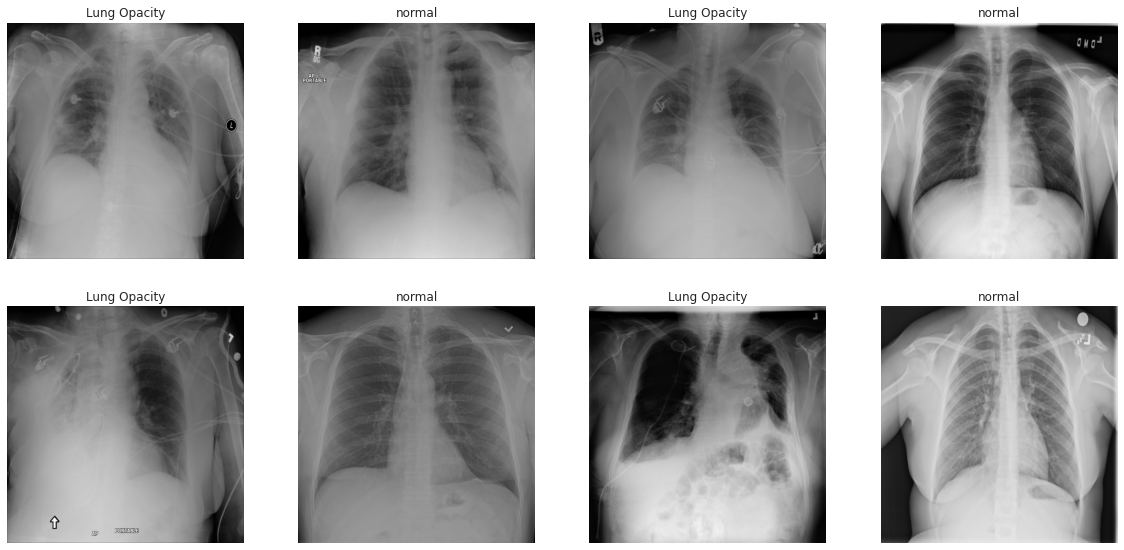

In [3]:
def show_images(images, rows=4, cols=4, figsize=(20, 20),title=None):
    figure = plt.figure(figsize=figsize)
    for idx, img in enumerate(images):
        label = img.split('_')[1].split('.')[0] 
        ax = plt.subplot(rows, cols, idx + 1)
        img = image.imread(os.path.join(sample_imgs_dir, img))
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
        if idx > 6:
            break
    if title is not None:
        plt.title(title)
show_images(sample_imgs_names)

From now on we will be working with tabular data.

For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data. 

In [4]:
data_dir = '../FILES/public_data'    # Change this to the directory where you put the input data
# data_dir = 'sample_data'
data_name = 'Hygieia'       # The sample_data directory should contain only a very small subset of the data
!ls $data_dir*

Hygieia_feat.name   Hygieia_test.data	Hygieia_train.solution
Hygieia_label.name  Hygieia_train.data	Hygieia_valid.data


In [5]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading ../FILES/public_data/Hygieia_train from AutoML format
Number of examples = 10863
Number of features = 1280
          Class
0        Normal
1  Lung Opacity
Number of classes = 2


We start with some simple statistical measurements

In [6]:
data["label"]=data["target"].map(lambda label:0 if label == "Normal" else 1)
data.shape

(10863, 1282)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10863 entries, 0 to 10862
Columns: 1282 entries, feature0 to label
dtypes: float64(1280), int64(1), object(1)
memory usage: 106.2+ MB


In [8]:
data.head()

feature0  feature1  feature2  feature3  feature4  feature5  feature6  \
0   0.00291  0.804759  2.111314  2.535085  0.688639  0.000000  0.000000   
1   0.00000  0.134767  0.646145  2.826820  0.057465  0.030546  0.794660   
2   0.00000  0.193429  0.503098  0.294491  0.124001  0.000000  1.134291   
3   0.00000  0.000000  1.985628  1.163101  1.115369  0.000000  0.087463   
4   0.00000  0.559142  1.255292  2.264184  0.697716  0.000000  1.107039   

   feature7  feature8  feature9  ...  feature1272  feature1273  feature1274  \
0       0.0  0.021106  0.000000  ...     0.218826     0.585881     0.379260   
1       0.0  0.047992  0.223520  ...     1.074303     0.392546     0.000000   
2       0.0  0.000000  1.446098  ...     0.582472     0.087976     0.370408   
3       0.0  0.000000  0.157544  ...     0.032489     0.394469     0.810608   
4       0.0  0.036623  0.773659  ...     1.679408     1.736134     0.082511   

   feature1275  feature1276  feature1277  feature1278  feature1279  \
0     0.977448     0.032584     0.001272     0.376287     1.029641   
1     1.038020     0.000000     0.040619     0.806104     0.137512   
2     1.675115     0.033976     0.000827     0.836973     0.084402   
3     0.574182     0.000000     0.000000     0.290487     0.492839   
4     1.631885     0.007920     0.137875     0.006160     0.094129   

         target  label  
0  Lung Opacity      1  
1  Lung Opacity      1  
2        Normal      0  
3  Lung Opacity      1  
4        Normal      0  

[5 rows x 1282 columns]

In [9]:
data.describe() 

feature0      feature1      feature2      feature3      feature4  \
count  10863.000000  10863.000000  10863.000000  10863.000000  10863.000000   
mean       0.019619      0.383897      1.006347      1.345905      0.343280   
std        0.074717      0.405779      0.537161      0.686615      0.383489   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.032196      0.610784      0.847976      0.034076   
50%        0.000000      0.252163      0.961905      1.296365      0.198981   
75%        0.000000      0.627857      1.348726      1.794512      0.544449   
max        1.463253      2.512410      3.837889      4.169315      2.608113   

           feature5      feature6      feature7      feature8      feature9  \
count  10863.000000  10863.000000  10863.000000  10863.000000  10863.000000   
mean       0.007951      0.610285      0.004113      0.026363      0.166076   
std        0.050983      0.563551      0.026003      0.087842      0.237610   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.138899      0.000000      0.000000      0.003146   
50%        0.000000      0.478287      0.000000      0.000000      0.069646   
75%        0.000000      0.935661      0.000000      0.006033      0.226965   
max        1.101609      3.831199      0.781239      1.683091      2.655883   

       ...   feature1271   feature1272   feature1273   feature1274  \
count  ...  10863.000000  10863.000000  10863.000000  10863.000000   
mean   ...      0.596389      0.471902      0.674221      0.249883   
std    ...      0.514410      0.449236      0.615452      0.330901   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.154168      0.078119      0.131794      0.008519   
50%    ...      0.491962      0.358762      0.538286      0.108838   
75%    ...      0.923469      0.747016      1.057146      0.371611   
max    ...      3.040727      3.019748      3.583396      2.633327   

        feature1275   feature1276   feature1277   feature1278   feature1279  \
count  10863.000000  10863.000000  10863.000000  10863.000000  10863.000000   
mean       1.233481      0.033015      0.120029      0.414858      0.239483   
std        0.663477      0.107249      0.223816      0.400700      0.320565   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.742184      0.000000      0.000000      0.080533      0.007585   
50%        1.187659      0.000000      0.010926      0.308085      0.111724   
75%        1.671489      0.003890      0.143261      0.641629      0.352541   
max        4.470284      2.315681      2.166506      2.389962      3.240159   

              label  
count  10863.000000  
mean       0.404492  
std        0.490816  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 1281 columns]

We are now going to preprocess the data a little bit. For this we will use a Principal Component Analysis.

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
x_pca=pca.fit_transform(data.iloc[:,:-2])

In [12]:
print(pca.explained_variance_ratio_[:30])

[0.17048556 0.07362268 0.0560053  0.04369261 0.03387764 0.03257133
 0.02743764 0.02540762 0.02096788 0.01931513 0.01836053 0.01630968
 0.01496628 0.01434042 0.01407016 0.01222583 0.01036864 0.00953895
 0.00942533 0.0092339  0.00858333 0.00836026 0.00793195 0.00740919
 0.00702284 0.0066667  0.00657063 0.00615832 0.00587391 0.00568272]


Plot the data with only top 2 principal components.

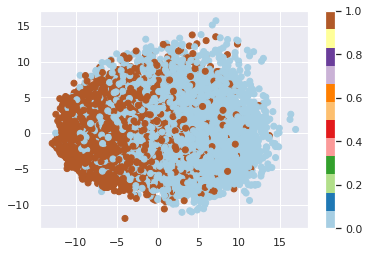

In [13]:
# scatter the top 2 principal components, with label as color
plt.scatter(x_pca[:,0], x_pca[:,1], c=data["label"],cmap="Paired", )
plt.colorbar()
plt.show()

In [14]:
xcorr = data.iloc[:,:-2].corr()

In [15]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

desc_xcorr = xcorr.abs().unstack().sort_values(ascending = False)
desc_xcorr = desc_xcorr.reset_index()
desc_xcorr = desc_xcorr[(desc_xcorr.iloc[:, 0] != desc_xcorr.iloc[:, 1])]
display(desc_xcorr.iloc[:10])

level_0      level_1         0
1280   feature474    feature92  0.744288
1281    feature92   feature474  0.744288
1282   feature187  feature1196  0.705080
1283  feature1196   feature187  0.705080
1284   feature177   feature716  0.691669
1285   feature716   feature177  0.691669
1286    feature41   feature305  0.689984
1287   feature305    feature41  0.689984
1288  feature1092   feature718  0.686974
1289   feature718  feature1092  0.686974

In [16]:
top_corr_feat = desc_xcorr.iloc[:10, 0].unique()

<AxesSubplot:>

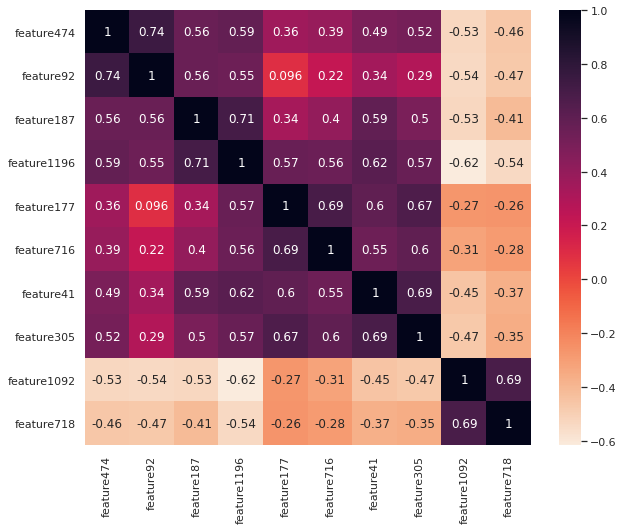

In [17]:
# heatmap of top correlation
plt.figure(figsize=(10,8))
sns.heatmap(xcorr.loc[top_corr_feat, top_corr_feat], annot=True, cmap='rocket_r')

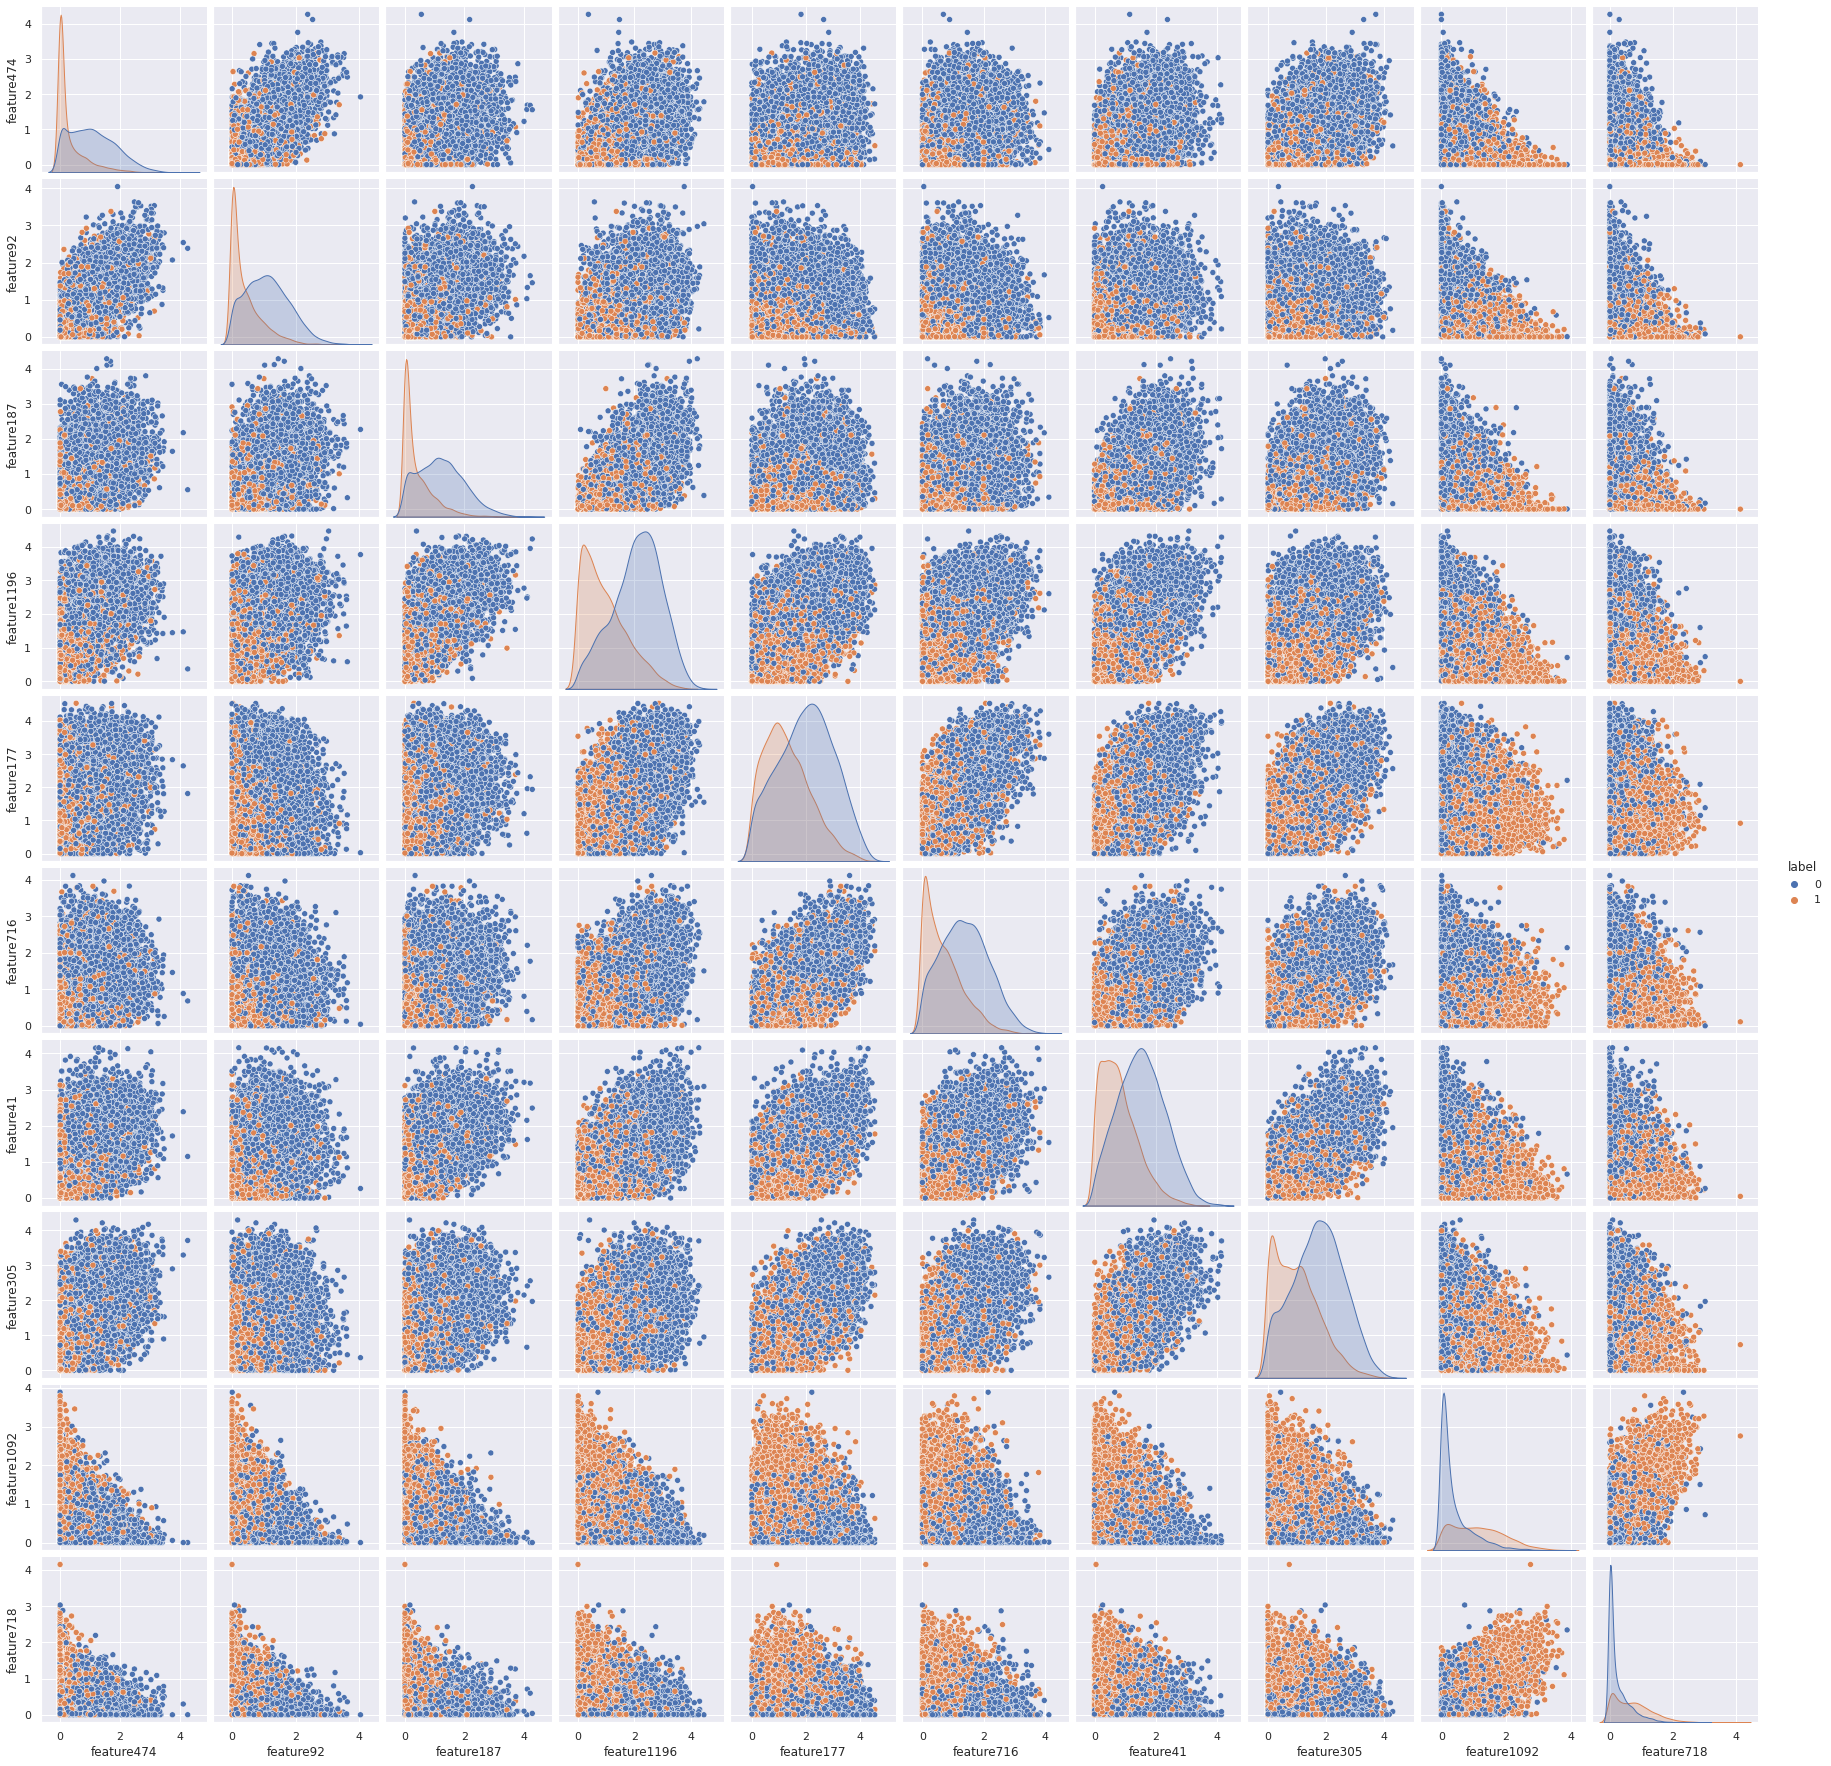

In [18]:
# pairplot of top correlation, with label as color
sns.pairplot(data, vars=top_corr_feat, hue='label')

<div style="background:#FFFFAA">
<h1>Step 2: Building a predictive model</h1>
</div>

<div style="background:#FFFFAA">
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:

</div>

In [19]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file NOT found : /mnt/Data/MyData/Education/Master AI Saclay 2020/Content/AI/Project A/upsaclay-hygieia/FILES/public_data/Hygieia_public.info
DataManager : Hygieia
info:
	usage = No Info File
	name = Hygieia
	format = dense
	is_sparse = 0
	has_categorical = 0
	has_missing = 0
	target_num = 1
	label_num = 2
	task = binary.classification
	target_type = Binary
	metric = auc_metric
	feat_type = Mixed
	feat_num = 1280
	train_num = 10863
	valid_num = 2000
	test_num = 2000
	time_budget = 600
data:
	X_train = array(10863, 1280)
	Y_train = array(10863,)
	X_valid = array(2000, 1280)
	Y_valid = array(0,)
	X_test = array(2000, 1280)
	Y_test = array(0,)
feat_type:	array(1280,)
feat_idx:	array(0,)



In [20]:
D.data["Y_valid"]

array([], dtype=float64)

<div style="background:#FFFFAA">
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [21]:
from data_io import write
from model import model
# Uncomment the next line to show the code of the model
#??model 
%autoreload 2

<div style="background:#FFFFAA">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [22]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)             
# from sklearn.ensemble import RandomForestClassifier
# M = RandomForestClassifier(max_depth=5, random_state=0)
M.fit(D.data['X_train'],D.data['Y_train'])

RandomForestClassifier(max_depth=5)

<div style="background:#FFFFAA">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [23]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on training examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

In [24]:
D.data['Y_train'].shape

(10863,)

<div style="background:#FFFFAA">
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [25]:
M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

sample_result_submission/Hygieia_test.predict
sample_result_submission/Hygieia_train.predict
sample_result_submission/Hygieia_valid.predict


<div style="background:#FFFFAA">
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [26]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: accuracy_score


<div style="background:#FFFFAA">
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [27]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy_score metric = 0.8682
Ideal score for the accuracy_score metric = 1.0000


You can add here other scores and result visualization.

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_train, Y_hat_train)

array([[5936,  533],
       [ 899, 3495]])

<div style="background:#FFFFAA">
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [29]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


CV score (95 perc. CI): 0.85 (+/- 0.01)


<div style="background:#FFFFAA">
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [30]:
!source activate python3; python $problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir

/bin/bash: activate: No such file or directory
Using input_dir: /mnt/Data/MyData/Education/Master AI Saclay 2020/Content/AI/Project A/upsaclay-hygieia/FILES/public_data
Using output_dir: /mnt/Data/MyData/Education/Master AI Saclay 2020/Content/AI/Project A/upsaclay-hygieia/starting_kit/sample_result_submission
Using program_dir: /mnt/Data/MyData/Education/Master AI Saclay 2020/Content/AI/Project A/upsaclay-hygieia/starting_kit/ingestion_program
Using submission_dir: /mnt/Data/MyData/Education/Master AI Saclay 2020/Content/AI/Project A/upsaclay-hygieia/starting_kit/sample_code_submission

========== Ingestion program version 6 ==========

************************************************
******** Processing dataset Hygieia ********
************************************************
========= Reading and converting data ==========
Info file NOT found : /mnt/Data/MyData/Education/Master AI Saclay 2020/Content/AI/Project A/upsaclay-hygieia/FILES/public_data/Hygieia_public.info
========= Readi

<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [31]:
scoring_output_dir = 'scoring_output'
!source activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

/bin/bash: activate: No such file or directory
======= Set 1 (Hygieia_train): accuracy_score(set1_score)=0.868176378533 =======


<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [32]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_21-02-03-19-45.zip
../sample_result_submission_21-02-03-19-45.zip
